<a href="https://colab.research.google.com/github/NandaAbhilash/CN6005/blob/main/CN6005Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.56
R² Score: 0.58


ExactExplainer explainer: 4129it [00:30, 123.04it/s]                          


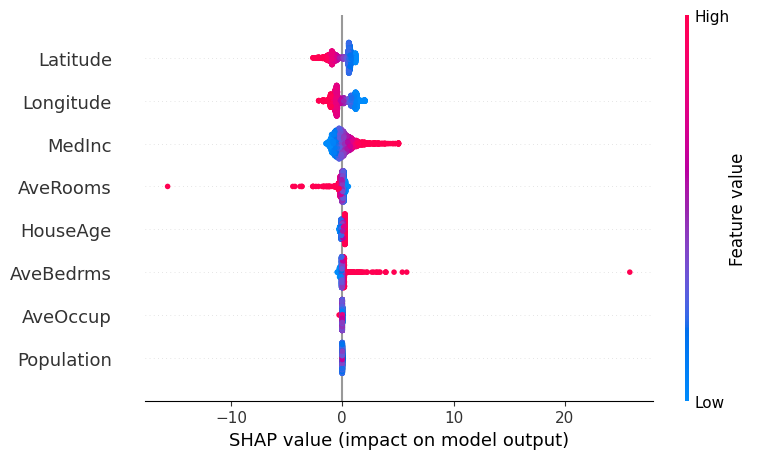

In [1]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseValue")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# SHAP explanation
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

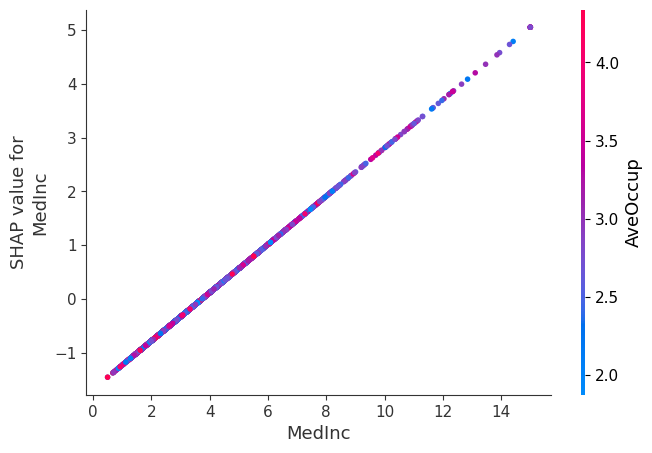

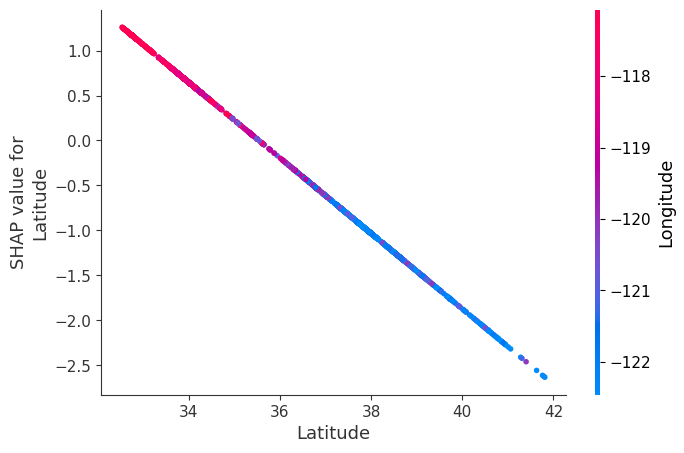

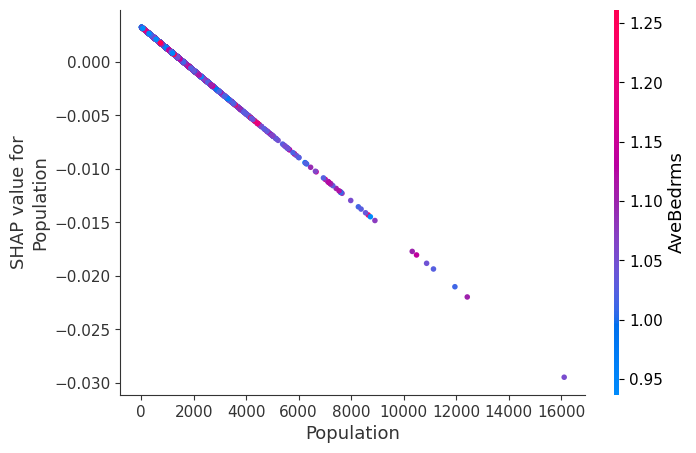

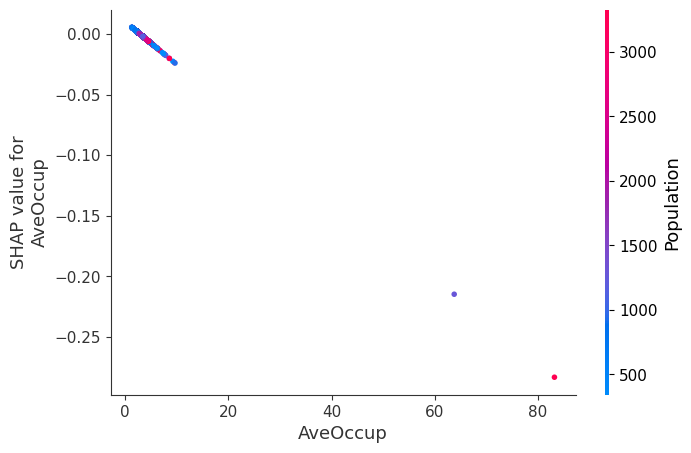

In [3]:
# Generate SHAP dependence plots for selected features
selected_features = ['MedInc', 'Latitude', 'Population', 'AveOccup']
for feature in selected_features:
    shap.dependence_plot(feature, shap_values.values, X_test, feature_names=X_test.columns)
    plt.savefig(f"shap_dependence_{feature}.png")
    plt.close()